In [2]:
# !pip install PyPortfolioOpt

In [3]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôîÎ•º ÏúÑÌïú PyPortfolioOpt ÎùºÏù¥Î∏åÎü¨Î¶¨
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï∂úÎ†• ÏòµÏÖò ÏÑ§Ï†ï
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# --- ÏÑ§Ï†ïÍ∞í ---
INPUT_FILENAME = "top_50_zscore_rank_3Y.csv"
# ---

try:
    top_50_df = pd.read_csv(INPUT_FILENAME)
    tickers = top_50_df['Ticker'].tolist()
    tickers = list(set(tickers))

    print(f"‚úÖ '{INPUT_FILENAME}'ÏóêÏÑú ÏÉÅÏúÑ {len(tickers)}Í∞ú Ìã∞Ïª§Î•º Î∂àÎü¨ÏôîÏäµÎãàÎã§.")
    print(tickers)
except FileNotFoundError:
    print(f"‚ùå Ïò§Î•ò: '{INPUT_FILENAME}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ Îã®Í≥ÑÎ•º Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
    tickers = []



‚úÖ 'top_50_zscore_rank_3Y.csv'ÏóêÏÑú ÏÉÅÏúÑ 50Í∞ú Ìã∞Ïª§Î•º Î∂àÎü¨ÏôîÏäµÎãàÎã§.
['RGTI', 'SMMT', 'IESC', 'HRTG', 'DAVE', 'INOD', 'TGEN', 'PPTA', 'SLNO', 'CRDO', 'APLD', 'ACIC', 'RYTM', 'AAOI', 'STKE', 'AMSC', 'CLS', 'LMB', 'WULF', 'ZEPP', 'MOD', 'CVNA', 'SKYX', 'CIFR', 'VRT', 'ASM', 'TPC', 'OKLO', 'STRL', 'UAMY', 'IONQ', 'HOOD', 'ABBV', 'IREN', 'IAG', 'TMQ', 'MSTR', 'HIMS', 'HCA', 'ASTS', 'FTAI', 'RKLB', 'APP', 'QURE', 'MFH', 'DRUG', 'PSIX', 'POWL', 'TSSI', 'PLTR']


In [4]:
# if tickers:
#     # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ ÏÑ§Ï†ï (Ïò§ÎäòÎ∂ÄÌÑ∞ 3ÎÖÑ Ï†ÑÍπåÏßÄ)
#     end_date = datetime.today()
#     start_date = end_date - timedelta(days=3*365)
    
#     print(f"\n‚úÖ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ: {start_date.strftime('%Y-%m-%d')} ~ {end_date.strftime('%Y-%m-%d')}")
    
#     # yfinanceÎ•º ÌÜµÌï¥ 50Í∞ú Ï¢ÖÎ™©Ïùò ÏàòÏ†ï Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§.
#     prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].dropna(how="all")
#     print("\n‚úÖ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏôÑÎ£å!")
#     display(prices.head())

In [5]:
if tickers:
    # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ ÏÑ§Ï†ï
    end_date = datetime.today()
    start_date = end_date - timedelta(days=3*365)
    
    print(f"\n‚úÖ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ: {start_date.strftime('%Y-%m-%d')} ~ {end_date.strftime('%Y-%m-%d')}")
    
    # yfinanceÎ•º ÌÜµÌï¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§.
    # ÏµúÏã† Î≤ÑÏ†ÑÏóêÏÑúÎäî auto_adjust=TrueÍ∞Ä Í∏∞Î≥∏Í∞íÏù¥ÎØÄÎ°ú 'Adj Close'Í∞Ä ÏïÑÎãå 'Close'Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    data = yf.download(tickers, start=start_date, end=end_date)
    
    # 'Close' Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌï©ÎãàÎã§. (Ïù¥Í≤ÉÏù¥ Ïù¥Ï†ú ÏàòÏ†ï Ï¢ÖÍ∞ÄÏûÖÎãàÎã§)
    if isinstance(data.columns, pd.MultiIndex):
        prices = data['Close'] # Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏàòÏ†ï
    else:
        prices = data[['Close']] # Ïù¥ Î∂ÄÎ∂ÑÎèÑ ÏàòÏ†ï

    prices = prices.dropna(how="all")
    
    print("\n‚úÖ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏôÑÎ£å!")
    display(prices.head())




‚úÖ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í∏∞Í∞Ñ: 2022-10-19 ~ 2025-10-18


/tmp/ipykernel_4178637/3381222765.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  50 of 50 completed



‚úÖ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏôÑÎ£å!


Ticker      AAOI        ABBV      ACIC  AMSC  APLD        APP   ASM  ASTS  \
Date                                                                        
2022-10-19  2.80  128.236862  0.481426  4.08  2.10  17.440001  0.57  6.84   
2022-10-20  2.83  128.057648  0.462169  4.00  2.05  17.799999  0.59  6.63   
2022-10-21  2.74  131.757889  0.414027  4.07  2.01  17.520000  0.63  6.36   
2022-10-24  2.71  135.189392  0.404398  4.20  2.07  17.670000  0.64  5.98   
2022-10-25  2.86  134.230713  0.414027  4.32  2.21  18.799999  0.63  6.31   

Ticker       CIFR    CLS   CRDO   CVNA    DAVE   DRUG       FTAI         HCA  \
Date                                                                           
2022-10-19  0.881   9.19  11.01  14.99  10.368  5.400  13.893128  203.986160   
2022-10-20  0.888   9.14  11.38  14.48  10.400  5.000  13.633790  203.420578   
2022-10-21  0.804   9.25  11.61  14.25  10.240  4.965  14.032061  191.767853   
2022-10-24  0.813   9.50  11.71  13.38   9.920  4.900  14.773025  205.127075   
2022-10-25  0.828  11.06  12.94  15.28  10.560  5.050  15.152772  209.066544   

Ticker      HIMS   HOOD  HRTG   IAG       IESC  INOD  IONQ  IREN   LMB  \
Date                                                                     
2022-10-19  4.09  10.11  1.44  1.26  30.549999  3.50  5.01  3.29  7.96   
2022-10-20  4.28   9.83  1.32  1.26  30.180000  3.71  5.07  3.09  7.93   
2022-10-21  4.37  10.14  1.43  1.38  31.830000  3.63  5.13  3.02  7.95   
2022-10-24  4.17  10.21  1.39  1.35  32.369999  3.38  5.06  2.91  7.90   
2022-10-25  4.33  10.83  1.39  1.42  32.509998  3.42  5.40  3.39  8.04   

Ticker           MFH        MOD       MSTR  OKLO  PLTR       POWL   PPTA  \
Date                                                                       
2022-10-19  0.776667  14.760000  22.608000  9.78  7.91  20.939550  1.710   
2022-10-20  0.922222  14.600000  22.101000  9.78  8.04  20.997370  1.700   
2022-10-21  0.985556  15.280000  23.261999  9.80  8.29  21.469547  1.730   
2022-10-24  0.988889  15.510000  23.760000  9.83  8.27  21.999538  1.735   
2022-10-25  0.933333  16.040001  26.868999  9.80  8.66  22.837893  1.770   

Ticker      PSIX       QURE  RGTI  RKLB       RYTM  SKYX  SLNO  SMMT   STKE  \
Date                                                                          
2022-10-19  1.95  18.570000  1.87  4.19  22.459999  3.60  1.41  1.21  0.320   
2022-10-20  1.95  18.620001  1.98  4.21  22.410000  3.42  1.44  1.20  0.320   
2022-10-21  1.80  19.260000  2.05  4.24  23.969999  3.63  1.41  1.12  0.320   
2022-10-24  1.75  18.469999  2.09  4.25  23.299999  3.64  1.32  1.02  0.368   
2022-10-25  1.82  18.920000  2.27  4.63  24.320000  3.67  1.30  1.13  0.368   

Ticker           STRL   TGEN   TMQ   TPC  TSSI  UAMY        VRT  WULF  ZEPP  
Date                                                                         
2022-10-19  24.690001  1.125  0.59  6.14  0.61  0.34  11.359422  1.13  5.00  
2022-10-20  24.160000  1.050  0.59  6.06  0.60  0.35  12.325971  1.11  4.80  
2022-10-21  24.920000  1.090  0.59  6.28  0.61  0.35  13.162980  1.21  4.68  
2022-10-24  25.250000  1.030  0.60  6.69  0.61  0.35  13.730951  1.27  4.48  
2022-10-25  26.340000  1.190  0.57  6.78  0.62  0.36  14.079705  1.41  4.52

In [6]:
if not prices.empty:
    # 1. Ïó∞Í∞Ñ Í∏∞ÎåÄÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò)
    mu = expected_returns.mean_historical_return(prices)
    # mu = expected_returns.ema_historical_return(prices)
    
    # 2. Ïó∞Í∞Ñ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ Í≥ÑÏÇ∞ (ÏúÑÌóò Î™®Îç∏)
    S = risk_models.sample_cov(prices)
    
    print("‚úÖ Ïó∞Í∞Ñ Í∏∞ÎåÄÏàòÏùµÎ•† (mu):")
    display(mu.head())
    print("\n‚úÖ Ïó∞Í∞Ñ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ (S):")
    display(S.head())

‚úÖ Ïó∞Í∞Ñ Í∏∞ÎåÄÏàòÏùµÎ•† (mu):


Ticker
AAOI    1.262805
ABBV    0.215800
ACIC    1.924672
AMSC    1.464922
APLD    1.551498
dtype: float64


‚úÖ Ïó∞Í∞Ñ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ (S):


Ticker      AAOI      ABBV      ACIC      AMSC      APLD       APP       ASM  \
Ticker                                                                         
AAOI    1.536413  0.002300  0.055010  0.383875  0.350658  0.307308  0.102264   
ABBV    0.002300  0.052737  0.001628  0.002638 -0.011319  0.006352  0.016156   
ACIC    0.055010  0.001628  1.117680  0.097609  0.188843  0.034111 -0.002901   
AMSC    0.383875  0.002638  0.097609  0.863438  0.304959  0.181031  0.073089   
APLD    0.350658 -0.011319  0.188843  0.304959  1.680751  0.199913  0.128715   

Ticker      ASTS      CIFR       CLS      CRDO      CVNA      DAVE      DRUG  \
Ticker                                                                         
AAOI    0.294305  0.440721  0.262357  0.332472  0.346714  0.254065 -0.241656   
ABBV    0.005014  0.006609  0.000830 -0.002590 -0.011416  0.007273 -0.036288   
ACIC    0.046305  0.115887  0.026771 -0.012970  0.060293  0.069063 -0.000841   
AMSC    0.239594  0.278096  0.151465  0.198879  0.321123  0.189018 -0.078830   
APLD    0.259938  0.559202  0.158773  0.202856  0.311706  0.173472 -0.050981   

Ticker      FTAI       HCA      HIMS      HOOD      HRTG       IAG      IESC  \
Ticker                                                                         
AAOI    0.159233  0.019262  0.228714  0.264092  0.066748  0.094258  0.241779   
ABBV    0.009009  0.010917  0.005199  0.007021  0.009832  0.007774  0.002091   
ACIC    0.025508  0.019880  0.012307  0.039868  0.185286  0.041042  0.057753   
AMSC    0.114976  0.021695  0.187246  0.183940  0.092902  0.079688  0.182075   
APLD    0.094534  0.005881  0.179670  0.245091  0.058399  0.102808  0.143431   

Ticker      INOD      IONQ      IREN       LMB       MFH       MOD      MSTR  \
Ticker                                                                         
AAOI    0.443372  0.389076  0.393271  0.172367  0.060294  0.238372  0.273044   
ABBV   -0.005673  0.002373 -0.016609  0.000873 -0.027992 -0.001704 -0.013214   
ACIC    0.092644  0.089081  0.060854  0.052933  0.032917  0.012693  0.048049   
AMSC    0.333278  0.281671  0.293379  0.160290  0.100617  0.177706  0.240211   
APLD    0.289746  0.380022  0.486300  0.161593  0.149556  0.191003  0.313427   

Ticker      OKLO      PLTR      POWL      PPTA      PSIX      QURE      RGTI  \
Ticker                                                                         
AAOI    0.195721  0.259964  0.165506  0.065948  0.180611  0.110501  0.430332   
ABBV    0.000129  0.008088 -0.000408  0.003370 -0.000195  0.007160  0.003363   
ACIC   -0.032025  0.053684  0.053376  0.053314  0.075713  0.052673  0.059162   
AMSC    0.169483  0.184773  0.104463  0.102681  0.097638  0.094239  0.356203   
APLD    0.244311  0.215601  0.157470  0.188971  0.122420 -0.010464  0.387611   

Ticker      RKLB      RYTM      SKYX      SLNO      SMMT      STKE      STRL  \
Ticker                                                                         
AAOI    0.226087  0.126621  0.180467  0.104927  0.093426  0.307285  0.172745   
ABBV    0.003096  0.019691  0.006769  0.004880  0.026960 -0.015904 -0.003188   
ACIC    0.049694  0.064125  0.093772 -0.088191  0.001641 -0.046114  0.039596   
AMSC    0.222166  0.177989  0.174654  0.024891  0.192475  0.104066  0.156735   
APLD    0.231111  0.101596  0.119516  0.115882  0.037063 -0.010193  0.151817   

Ticker      TGEN       TMQ       TPC      TSSI      UAMY       VRT      WULF  \
Ticker                                                                         
AAOI    0.165224  0.066084  0.127127  0.246542  0.146946  0.282281  0.408909   
ABBV    0.001971  0.007208 -0.001116  0.018512  0.009734 -0.001782  0.003808   
ACIC    0.042111  0.041619  0.016159  0.061651  0.019103  0.006317 -0.011473   
AMSC    0.138549  0.056385  0.166780  0.192477  0.106465  0.154964  0.280123   
APLD    0.221538  0.176796  0.147123  0.318772  0.187220  0.192854  0.608045   

Ticker      ZEPP  
Ticker            
AAOI    0.188989  
ABBV    0.010350

/data/anaconda3/envs/st_py311/lib/python3.11/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


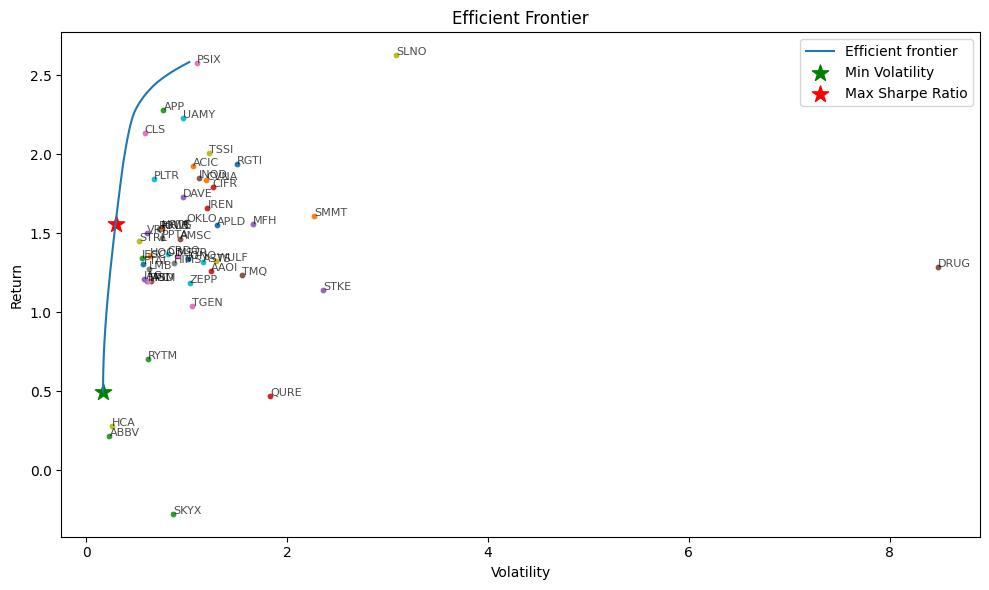


--- ÏµúÏÜå Î≥ÄÎèôÏÑ± Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---
Í∏∞ÎåÄÏàòÏùµÎ•†: 49.63%, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): 16.55%

--- ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---
Í∏∞ÎåÄÏàòÏùµÎ•†: 156.00%, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): 29.06%


In [7]:

# 'mu'ÏôÄ 'S'Îäî Ïù¥ÎØ∏ Í≥ÑÏÇ∞ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
if 'mu' in locals() and 'S' in locals():
    
    # 1. ÏµúÏÜå Î≥ÄÎèôÏÑ± Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≥ÑÏÇ∞
    # Í∞ùÏ≤¥Î•º ÏÉàÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
    ef_min_vol = EfficientFrontier(mu, S)
    min_vol_weights = ef_min_vol.min_volatility()
    min_vol_ret, min_vol_risk, _ = ef_min_vol.portfolio_performance()
    
    # 2. ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≥ÑÏÇ∞
    # Í∞ùÏ≤¥Î•º Îã§Ïãú ÏÉàÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
    ef_max_sharpe = EfficientFrontier(mu, S)
    max_sharpe_weights = ef_max_sharpe.max_sharpe()
    max_sharpe_ret, max_sharpe_risk, _ = ef_max_sharpe.portfolio_performance()

    # 3. ÏãúÍ∞ÅÌôî (Ìö®Ïú®Ï†Å Ìà¨ÏûêÏÑ†ÏùÄ Ìïú Î≤àÎßå Í≥ÑÏÇ∞)
    ef_for_plotting = EfficientFrontier(mu, S)
    fig, ax = plt.subplots(figsize=(10, 6))
    plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=False)
    
    # Í≥ÑÏÇ∞Îêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≤∞Í≥º ÌîåÎ°úÌåÖ
    ax.scatter(min_vol_risk, min_vol_ret, marker="*", color="g", s=150, label="Min Volatility")
    ax.scatter(max_sharpe_risk, max_sharpe_ret, marker="*", color="r", s=150, label="Max Sharpe Ratio")

    # # Í∞Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò Ìã∞Ïª§Î≥Ñ ÏúÑÏπò ÌëúÏãú
    for ticker in tickers:
        ret = mu[ticker]
        risk = np.sqrt(S.loc[ticker, ticker])
        ax.scatter(risk, ret, marker="o", s=10)
        ax.text(risk, ret, ticker, fontsize=8, alpha=0.7)
    

    # Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
    ax.set_title("Efficient Frontier")
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    print("\n--- ÏµúÏÜå Î≥ÄÎèôÏÑ± Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---")
    print(f"Í∏∞ÎåÄÏàòÏùµÎ•†: {min_vol_ret:.2%}, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): {min_vol_risk:.2%}")
    
    print("\n--- ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ---")
    print(f"Í∏∞ÎåÄÏàòÏùµÎ•†: {max_sharpe_ret:.2%}, Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨): {max_sharpe_risk:.2%}")

In [8]:
def print_weights(weights):
    """Í∞ÄÏ§ëÏπòÎ•º ÍπîÎÅîÌïòÍ≤å Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    weights_series = pd.Series(weights)
    # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå Ï∂úÎ†•
    print(weights_series[weights_series > 0.001].sort_values(ascending=False).to_string())

if 'ef' in locals():
    # Î¶¨Ïä§ÌÅ¨ Î≤îÏúÑÎ•º Ï†ïÏùòÌï©ÎãàÎã§ (ÏµúÏÜå Î≥ÄÎèôÏÑ± ~ ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò)
    min_risk_level = min_vol_risk
    max_risk_level = max_sharpe_risk
    risk_range = max_risk_level - min_risk_level
    
    # Î™©Ìëú Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùÑ ÌçºÏÑºÌä∏Î°ú Ï†ïÏùò
    target_risk_percentages = [0.60, 0.65, 0.70, 0.80, 0.90, 1.00]
    
    print("\n" + "="*50)
    print("           ÌäπÏ†ï Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÎ≥Ñ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò")
    print("="*50 + "\n")
    
    for p in target_risk_percentages:
        # Î™©Ìëú Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨) Í∞íÏùÑ Í≥ÑÏÇ∞
        target_risk = min_risk_level + risk_range * p
        
        print(f"--- Î¶¨Ïä§ÌÅ¨ ÏàòÏ§Ä: {p:.0%} (Î™©Ìëú Î≥ÄÎèôÏÑ±: {target_risk:.2%}) ---")
        
        try:
            # Ìï¥Îãπ Î™©Ìëú Î¶¨Ïä§ÌÅ¨Î•º Îã¨ÏÑ±ÌïòÎäî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞
            ef_target_risk = EfficientFrontier(mu, S)

            target_weights = ef_target_risk.efficient_risk(target_volatility=target_risk)
            
            # Í∞ÄÏ§ëÏπò Ï∂úÎ†•
            print_weights(target_weights)
            print("\n" + "-"*50 + "\n")
            
        except Exception as e:
            print(f"Ìï¥Îãπ Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§: {e}\n")

In [9]:
import json # JSON ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä

def print_weights(weights):
    """Í∞ÄÏ§ëÏπòÎ•º ÍπîÎÅîÌïòÍ≤å Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    weights_series = pd.Series(weights)
    # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå Ï∂úÎ†•
    print(weights_series[weights_series > 0.001].sort_values(ascending=False).to_string())

if 'ef' in locals():
    # Î¶¨Ïä§ÌÅ¨ Î≤îÏúÑÎ•º Ï†ïÏùòÌï©ÎãàÎã§ (ÏµúÏÜå Î≥ÄÎèôÏÑ± ~ ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò)
    min_risk_level = min_vol_risk
    max_risk_level = max_sharpe_risk
    risk_range = max_risk_level - min_risk_level
    
    # Î™©Ìëú Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùÑ ÌçºÏÑºÌä∏Î°ú Ï†ïÏùò
    target_risk_percentages = [0.60, 0.65, 0.70, 0.80, 0.90, 1.00]
    
    print("\n" + "="*50)
    print("           ÌäπÏ†ï Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÎ≥Ñ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò")
    print("="*50 + "\n")
    
    for p in target_risk_percentages:
        # Î™©Ìëú Î≥ÄÎèôÏÑ±(Î¶¨Ïä§ÌÅ¨) Í∞íÏùÑ Í≥ÑÏÇ∞
        target_risk = min_risk_level + risk_range * p
        
        print(f"--- Î¶¨Ïä§ÌÅ¨ ÏàòÏ§Ä: {p:.0%} (Î™©Ìëú Î≥ÄÎèôÏÑ±: {target_risk:.2%}) ---")
        
        try:
            # Ìï¥Îãπ Î™©Ìëú Î¶¨Ïä§ÌÅ¨Î•º Îã¨ÏÑ±ÌïòÎäî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞
            ef_target_risk = EfficientFrontier(mu, S)

            target_weights = ef_target_risk.efficient_risk(target_volatility=target_risk)
            
            # Í∞ÄÏ§ëÏπò Ï∂úÎ†•
            print_weights(target_weights)

            # üìå Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ: pÍ∞Ä 0.65Ïùº Îïå JSON ÌååÏùºÎ°ú Ï†ÄÏû•
            if p == 0.65:
                # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉàÎ°úÏö¥ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
                weights_to_save = {ticker: weight for ticker, weight in target_weights.items() if weight > 0.001}
                
                output_json_filename = 'portfolio_weights_65_risk.json'
                with open(output_json_filename, 'w', encoding='utf-8') as f:
                    json.dump(weights_to_save, f, ensure_ascii=False, indent=4)
                
                print(f"\n  ‚ú® 65% Î¶¨Ïä§ÌÅ¨ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Í∞Ä '{output_json_filename}' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

            print("\n" + "-"*50 + "\n")
            
        except Exception as e:
            print(f"Ìï¥Îãπ Î¶¨Ïä§ÌÅ¨ ÏàòÏ§ÄÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§: {e}\n")

In [16]:

# Îß•Ïä§ ÏÉ§ÌîÑ ÎπÑÏú® Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º JSON ÌååÏùºÎ°ú Ï†ÄÏû•
if 'max_sharpe_weights' in locals():
    # Í∞ÄÏ§ëÏπòÍ∞Ä 0.1% Ïù¥ÏÉÅÏù∏ Ï¢ÖÎ™©Îßå ÌïÑÌÑ∞ÎßÅ
    filtered_weights = {ticker: weight for ticker, weight in max_sharpe_weights.items() if weight > 0.001}
    
    # JSON ÌååÏùºÎ°ú Ï†ÄÏû•
    output_json_filename = 'portfolio_weights_max_sharpe.json'
    with open(output_json_filename, 'w', encoding='utf-8') as f:
        json.dump(filtered_weights, f, ensure_ascii=False, indent=4)
    
    print(f"\n‚úÖ Îß•Ïä§ ÏÉ§ÌîÑ ÎπÑÏú® Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä '{output_json_filename}' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
    print(f"   - Ï¢ÖÎ™© Ïàò: {len(filtered_weights)}")
    print(f"   - Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: {sum(filtered_weights.values()):.4f}")


‚úÖ Îß•Ïä§ ÏÉ§ÌîÑ ÎπÑÏú® Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä 'portfolio_weights_max_sharpe.json' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
   - Ï¢ÖÎ™© Ïàò: 22
   - Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: 0.9985


In [15]:
input_filename = 'portfolio_weights_max_sharpe.json'
try:
    with open(input_filename, 'r', encoding='utf-8') as f:
        weights = json.load(f)
    
    # ÌòÑÏû¨ Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ Í≥ÑÏÇ∞
    current_sum = sum(weights.values())
    
    # Í∏∞Ï°¥ Í∞ÄÏ§ëÏπòÎ•º Ï°∞Ï†ïÌïòÏó¨ Ï¥ùÌï©Ïù¥ 0.6Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅ
    M_V = 0.7

    # Î™®Îì† Í∞ÄÏ§ëÏπòÎ•º ÏÜåÏàòÏ†ê ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º
    scaling_factor = 1-M_V / current_sum
    scaled_weights = {ticker: weight * scaling_factor for ticker, weight in weights.items()}
    rounded_weights = {ticker: round(weight, 3) for ticker, weight in scaled_weights.items()}

    # MONEY Ìã∞Ïª§ Ï∂îÍ∞Ä (ÎπÑÏ§ë 0.4)
    scaled_weights['MONEY'] = M_V

    # ÎùºÏö¥Îî©ÏúºÎ°ú Ïù∏Ìïú Ïò§Ï∞®Î•º Î≥¥Ï†ïÌïòÏó¨ Ï†ïÌôïÌûà Ìï©Í≥ÑÍ∞Ä 1Ïù¥ ÎêòÎèÑÎ°ù Ï°∞Ï†ï
    total_after_rounding = sum(rounded_weights.values())
    if total_after_rounding != 1.00:
        # Í∞ÄÏû• ÌÅ∞ Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÑ Ìã∞Ïª§Ïóê Ïò§Ï∞®Î•º ÎçîÌïòÍ±∞ÎÇò ÎπºÏÑú Ìï©Í≥ÑÎ•º 1Î°ú ÎßûÏ∂§
        max_ticker = max(rounded_weights.items(), key=lambda x: x[1] if x[0] != 'MONEY' else 0)[0]
        rounded_weights[max_ticker] = round(rounded_weights[max_ticker] + (1.00 - total_after_rounding), 3)
    
    # ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º JSON ÌååÏùºÎ°ú Ï†ÄÏû•
    output_filename = 'final_portfolio_weights.json'
    with open(output_filename, 'w', encoding='utf-8') as f:
        json.dump(rounded_weights, f, ensure_ascii=False, indent=4)
    
    print(f"\n‚úÖ ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä '{output_filename}' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
    print(f"   - MONEY ÎπÑÏ§ë: {rounded_weights.get('MONEY', 0):.3f}")
    print(f"   - Í∏∞ÌÉÄ ÏûêÏÇ∞ ÎπÑÏ§ë Ï¥ùÌï©: {sum(rounded_weights.values()) - rounded_weights.get('MONEY', 0):.3f}")
    print(f"   - Ï†ÑÏ≤¥ ÎπÑÏ§ë Ï¥ùÌï©: {sum(rounded_weights.values()):.3f}")
    
except FileNotFoundError:
    print(f"‚ùå Ïò§Î•ò: '{input_filename}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ Îã®Í≥ÑÎ•º Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
except Exception as e:
    print(f"‚ùå Ïò§Î•ò Î∞úÏÉù: {str(e)}")


‚úÖ ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÍ∞Ä 'final_portfolio_weights.json' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
   - MONEY ÎπÑÏ§ë: 0.000
   - Í∏∞ÌÉÄ ÏûêÏÇ∞ ÎπÑÏ§ë Ï¥ùÌï©: 1.000
   - Ï†ÑÏ≤¥ ÎπÑÏ§ë Ï¥ùÌï©: 1.000


In [20]:
import json

# --- ÏÑ§Ï†ï ---
# 1. ÏµúÎåÄ ÏÉ§ÌîÑ ÏßÄÏàò Í∞ÄÏ§ëÏπòÍ∞Ä Ï†ÄÏû•Îêú JSON ÌååÏùº Í≤ΩÎ°ú
max_sharpe_weights_path = r'final_portfolio_weights.json'
# 2. ÏµúÏ¢Ö Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Ï†ÄÏû•Ìï† ÌååÏùº Í≤ΩÎ°ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
final_portfolio_path = r'final_portfolio_with_cash.json'

# 3. Í≥†Ï†ïÌï† ÌòÑÍ∏à(MONEY) ÎπÑÏ§ë
CASH_WEIGHT = 0.8
# 4. ÎÇòÎ®∏ÏßÄ ÏûêÏÇ∞Ïóê Ìï†ÎãπÎê† ÎπÑÏ§ë
EQUITY_WEIGHT = 1 - CASH_WEIGHT

# --- Î°úÏßÅ ---
# Í∏∞Ï°¥ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò Î°úÎìú
with open(max_sharpe_weights_path, 'r', encoding='utf-8') as f:
    original_weights = json.load(f)

# ÏÉàÎ°úÏö¥ Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞Ìï† ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
adjusted_weights = {}

# Í∞Å ÏûêÏÇ∞Ïùò Í∞ÄÏ§ëÏπòÎ•º ÎÇ®ÏùÄ ÎπÑÏ§ë(0.6)Ïóê ÎßûÏ∂∞ Ïû¨Í≥ÑÏÇ∞ÌïòÍ≥† ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÏóêÏÑú Î∞òÏò¨Î¶º
for ticker, weight in original_weights.items():
    adjusted_weights[ticker] = round(weight * EQUITY_WEIGHT, 3)

# ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÏóêÏÑú 0.000Ïù∏ Ìï≠Î™© Ï†úÍ±∞
adjusted_weights = {k: v for k, v in adjusted_weights.items() if v != 0.000}

# Î∞òÏò¨Î¶º ÌõÑ MONEYÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄÏùò Ìï©Í≥Ñ Í≥ÑÏÇ∞
equity_sum = sum(adjusted_weights.values())

# MONEYÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄÏùò Ìï©Ïù¥ Ï†ïÌôïÌûà 0.6Ïù¥ ÎêòÎèÑÎ°ù Ï°∞Ï†ï
if equity_sum != EQUITY_WEIGHT:
    # Í∞ÄÏû• ÌÅ∞ Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÑ ÏûêÏÇ∞Ïóê Ïò§Ï∞®Î•º Î≥¥Ï†ï
    difference = round(EQUITY_WEIGHT - equity_sum, 3)
    max_ticker = max(adjusted_weights.items(), key=lambda x: x[1])[0]
    adjusted_weights[max_ticker] = round(adjusted_weights[max_ticker] + difference, 3)

# ÌòÑÍ∏à ÎπÑÏ§ë Ï∂îÍ∞Ä
adjusted_weights['MONEY'] = CASH_WEIGHT

# --- Í≤∞Í≥º ÌôïÏù∏ ---
print(f"‚úÖ ÌòÑÍ∏à ÎπÑÏ§ë {CASH_WEIGHT}Î•º Ï†ÅÏö©ÌïòÏó¨ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º Ïû¨Ï°∞Ï†ïÌñàÏäµÎãàÎã§.")
print("\n--- ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò ---")

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
for ticker, weight in sorted(adjusted_weights.items()):
    print(f"- {ticker:<6}: {weight:.3f}")

print("---------------------------------------")
# MONEYÎ•º Ï†úÏô∏Ìïú ÏûêÏÇ∞Îì§Ïùò Ìï©Í≥ÑÏôÄ Ï†ÑÏ≤¥ Ìï©Í≥Ñ Í≤ÄÏ¶ù
equity_total = sum(v for k, v in adjusted_weights.items() if k != 'MONEY')
total_weight = sum(adjusted_weights.values())
print(f"üìä MONEY Ï†úÏô∏ Ï¥ù Í∞ÄÏ§ëÏπò: {equity_total:.3f}")
print(f"üìä Ï†ÑÏ≤¥ Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: {total_weight:.3f}")


# --- ÌååÏùº Ï†ÄÏû• (ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú) ---
with open(final_portfolio_path, 'w', encoding='utf-8') as f:
    json.dump(adjusted_weights, f, indent=4)
print(f"\n‚úÖ Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º '{final_portfolio_path}' ÌååÏùºÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")


‚úÖ ÌòÑÍ∏à ÎπÑÏ§ë 0.8Î•º Ï†ÅÏö©ÌïòÏó¨ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπòÎ•º Ïû¨Ï°∞Ï†ïÌñàÏäµÎãàÎã§.

--- ÏµúÏ¢Ö Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏ§ëÏπò ---
- ABBV  : 0.009
- ACIC  : 0.004
- APP   : 0.005
- ASM   : 0.001
- CLS   : 0.150
- FTAI  : 0.003
- HCA   : 0.002
- HRTG  : 0.004
- IAG   : 0.004
- MFH   : 0.002
- MONEY : 0.800
- PLTR  : 0.002
- POWL  : 0.002
- PPTA  : 0.001
- PSIX  : 0.004
- SLNO  : 0.001
- STRL  : 0.001
- TSSI  : 0.001
- UAMY  : 0.003
- ZEPP  : 0.001
---------------------------------------
üìä MONEY Ï†úÏô∏ Ï¥ù Í∞ÄÏ§ëÏπò: 0.200
üìä Ï†ÑÏ≤¥ Í∞ÄÏ§ëÏπò Ìï©Í≥Ñ: 1.000

‚úÖ Ï°∞Ï†ïÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º 'final_portfolio_with_cash.json' ÌååÏùºÏóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.
